In [2]:
import os
import pandas as pd
from scipy import sparse
from sklearn.metrics.pairwise import cosine_similarity



dataset_path = os.path.abspath('../Dataset/data-small/')
ratings = pd.read_csv(dataset_path + '/ratings.csv')
movies = pd.read_csv(dataset_path + '/movies.csv')


In [3]:
ratings
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [6]:
movie_data = pd.merge(movies,ratings,on='movieId')
movie_data.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


In [11]:
data = data.drop(['timestamp'],axis = 1)
data.head()

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,3.5
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4,3.0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0


In [7]:
trend=pd.DataFrame(movie_data.groupby('title')['rating'].mean())
trend['total number of ratings'] = pd.DataFrame(movie_data.groupby('title')['rating'].count()) 
trend.head()

,rating,total number of ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


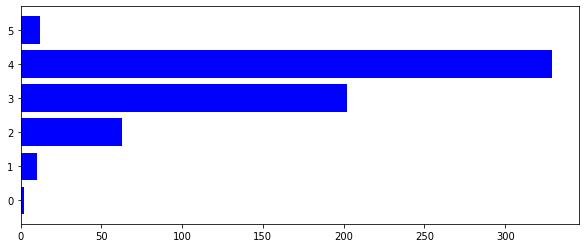

In [8]:
import matplotlib.pyplot as plt

#plot rounded-up ratings with number of movies
plt.figure(figsize =(10, 4))
ax=plt.barh(trend['rating'].round(),trend['total number of ratings'],color='b')
plt.show()

C:\Users\Paradox\AppData\Local\Temp/ipykernel_10876/2847404157.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(trend.index,rotation=40,fontsize='12',horizontalalignment="right")


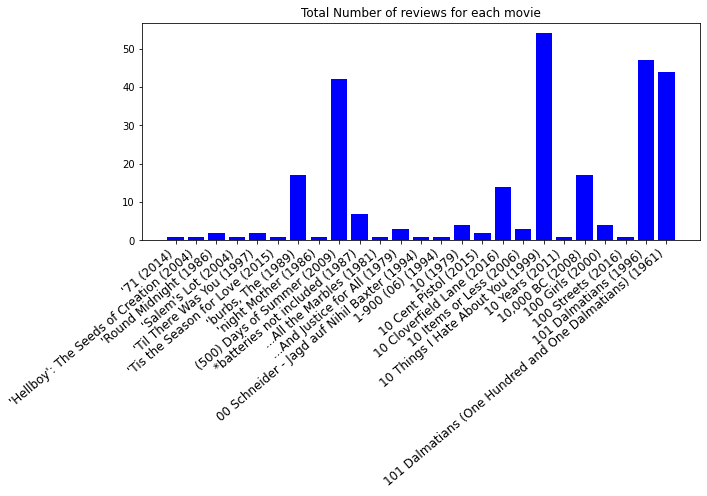

In [9]:
#a bar graph descibibg number of reviews for first 25 movies
plt.figure(figsize =(10, 4))
ax=plt.subplot()
ax.bar(trend.head(25).index,trend['total number of ratings'].head(25),color='b')
ax.set_xticklabels(trend.index,rotation=40,fontsize='12',horizontalalignment="right")
ax.set_title("Total Number of reviews for each movie")
plt.show()

In [11]:
data['year'] = data.title.str.extract('(\\d\d\d\d\))',
expand=False)
#Removing the parentheses
data['year'] = data.year.str.extract('(\d\d\d\d)',expand=False)
#Removing the years from the 'title' column
data['title'] = data.title.str.replace('(\(\d\d\d\d\))', '')
#Applying the strip function to get rid of any ending whitespace characters that may have appeared
data['title'] = data['title'].apply(lambda x: x.strip())
data.drop(columns=['genres'], inplace=True)

C:\Users\Paradox\AppData\Local\Temp/ipykernel_10876/3088166702.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  data['title'] = data.title.str.replace('(\(\d\d\d\d\))', '')


In [12]:
data


,movieId,title,userId,rating,timestamp,year
0,1,Toy Story,1,4.0,964982703,1995
1,1,Toy Story,5,4.0,847434962,1995
2,1,Toy Story,7,4.5,1106635946,1995
3,1,Toy Story,15,2.5,1510577970,1995
4,1,Toy Story,17,4.5,1305696483,1995
...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic,184,4.0,1537109082,2017
100832,193583,No Game No Life: Zero,184,3.5,1537109545,2017
100833,193585,Flint,184,3.5,1537109805,2017
100834,193587,Bungo Stray Dogs: Dead Apple,184,3.5,1537110021,2018
